# 06. 다양한 분류 모델

---
* 날짜:
* 이름:

```
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"]='sans'
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"]='sans'

## **실습**

---
### **Data**
---


![](https://t1.daumcdn.net/tistoryfile/fs13/27_tistory_2009_11_29_22_54_4b127d29159f6?x-content-disposition=inline)

`Iris` 데이터셋

* caseno: 일련번호 (1부터 150)  
* Sepal Length: 꽃받침의 길이 
* Sepal Width: 꽃받침의 너비  
* Petal Length: 꽃잎의 길이  
* Petal Width: 꽃잎의 너비    
* Species: 꽃의 종류 .  
* Label: setosa / versicolor / virginica 의 3종류




* `sklearn`의 `datasets` 에서 `iris` 데이터셋 불러오기

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
type(iris)
iris.keys()  #data는 x target은 y

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

* iris 데이터를 x, y 로 분류하기

In [ ]:
x = iris['data']
y = iris['target']
x.shape, y.shape

((150, 4), (150,))

* 예측값 히스토그램 그리기

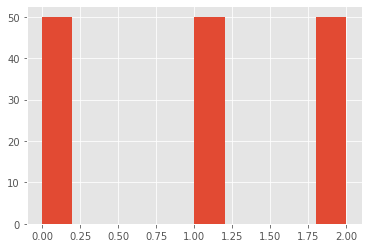

In [ ]:
plt.hist(y)
plt.show()

---
### **모델학습**
---


In [ ]:
from sklearn import linear_model,svm,ensemble

#### **소프트맥스 회귀**

In [ ]:
linear = linear_model.LogisticRegression(multi_class='multinomial')
linear.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial')

#### **Support Vector Classification, SVC**


<p align='center'>
<img src=https://img1.daumcdn.net/thumb/R1280x0.fjpg/?fname=http://t1.daumcdn.net/brunch/service/user/8fdM/image/LyeQ7scQcaEY_QxixKwKxFnIkDA width=450>
</p>

In [ ]:
svc = svm.SVC()
svc.fit(x,y)

SVC()

#### **Random Forest**


<p align='center'>
<img src=https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg width=450>
</p>


In [ ]:
rnd_forest = ensemble.RandomForestClassifier()
rnd_forest.fit(x,y)

RandomForestClassifier()

#### **Adaptive Boosting Classifier**

<p align='center'>
<img src=https://sdtrd011.github.io/assets/img/markdown/Boosting/boosting.png  width=450>
</p>

In [ ]:
adaboost = ensemble.AdaBoostClassifier()
adaboost.fit(x,y)

AdaBoostClassifier()

---
#### **성능평가**
---


In [ ]:
from sklearn import metrics

def evaluate(model,x,y):
  y_pred  = model.predict(x)
  print(y_pred.shape)
  m = metrics.confusion_matrix(y,y_pred)
  sns.heatmap(m,annot=True)
  plt.show()

  acc = model.score(x,y)
  print("* ACC: ", acc)

* 소프트맥스 회귀

(150,)


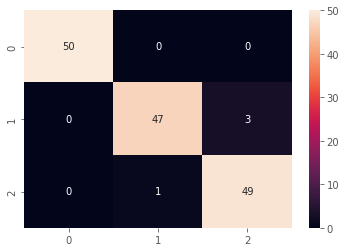

* ACC:  0.9733333333333334


In [ ]:
evaluate(linear,x,y)

* SVC

(150,)


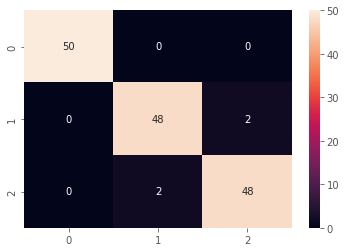

* ACC:  0.9733333333333334


In [ ]:
evaluate(svc,x,y)

* rnd_forest

(150,)


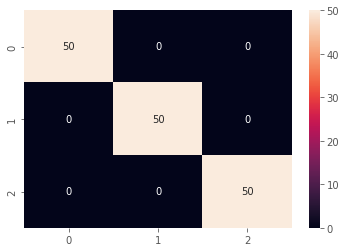

* ACC:  1.0


In [ ]:
evaluate(rnd_forest,x,y)

* adaboost

(150,)


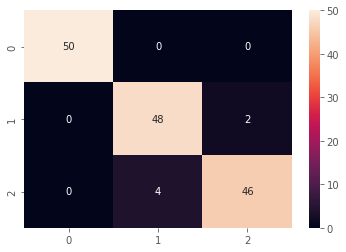

* ACC:  0.96


In [ ]:
evaluate(adaboost,x,y)

## **과제**


---
### **과제01**
---

`Pandas` 데이터셋의  `penguins`를 사용합니다. 펭귄의 성별을 다양한 모델을 이용해 예측해 보세요 

In [ ]:
import seaborn as sns
import pandas
df_pre = sns.load_dataset("penguins")
df_pre.head()
def preprocess_penguins(df_pre):

  #범주형 수치화(성별,섬,종)
  mask_m = df_pre["sex"] =='Male'
  mask_f = df_pre["sex"] =='Female'
  df_pre.loc[mask_m, "sex"] =0
  df_pre.loc[mask_f, "sex"] =1

  mask_i_t = df_pre["island"] =='Torgersen'
  mask_i_b = df_pre["island"] =='Biscoe'
  mask_i_d = df_pre["island"] =='Dream'
  df_pre.loc[mask_i_t, "island"] =0
  df_pre.loc[mask_i_b, "island"] =1
  df_pre.loc[mask_i_d, "island"] =2

  mask_s_a = df_pre["species"] =='Adelie' 
  mask_s_c = df_pre["species"] =='Chinstrap'
  mask_s_g = df_pre["species"] =='Gentoo'
  df_pre.loc[mask_s_a, "species"] =0
  df_pre.loc[mask_s_c, "species"] =1
  df_pre.loc[mask_s_g, "species"] =2
  
  #min-max정규화
  for col in ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']:
    df_pre[col] = (df_pre[col]-df_pre[col].min())/(df_pre[col].max()-df_pre[col].min())
  #(object->int)
  
  #결측값 줄삭제
  df_pre = df_pre.dropna(axis=0)
  return df_pre

train=preprocess_penguins(df_pre)
df=train.to_numpy()
X = df[:, :-1]
Y = df[:, -1]
print(X.shape,Y.shape)
Y = np.array(Y, dtype='int')
X[0] = np.array(X[0], dtype='int')
X[1] = np.array(X[1], dtype='int')
from sklearn import metrics

def evaluate(model,x,y):
  y_pred  = model.predict(x)
  print(y_pred.shape)
  m = metrics.confusion_matrix(y,y_pred)
  sns.heatmap(m,annot=True)
  plt.show()

  acc = model.score(x,y)
  print("* ACC: ", acc)

(333, 6) (333,)


* softmax회귀

(333,)


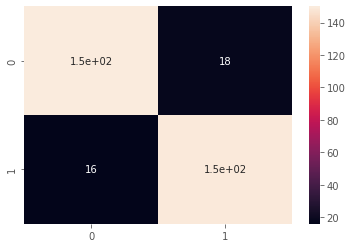

* ACC:  0.8978978978978979


In [ ]:
linear = linear_model.LogisticRegression(multi_class='multinomial')
linear.fit(X,Y)
evaluate(linear,X,Y)

*SVC

(333,)


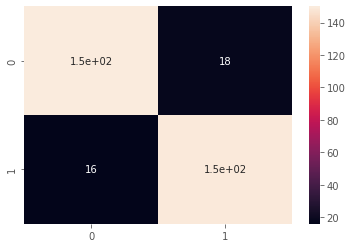

* ACC:  0.8978978978978979


In [ ]:
svc = svm.SVC()
svc.fit(X,Y)
evaluate(linear,X,Y)

* rnd_forest

(333,)


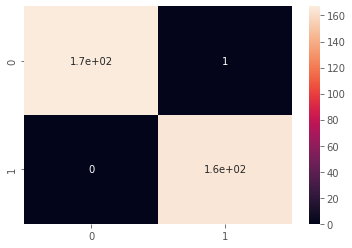

* ACC:  0.996996996996997


In [ ]:
rnd_forest = ensemble.RandomForestClassifier()
rnd_forest.fit(X,Y)
evaluate(rnd_forest,X,Y)

* adaboost

(333,)


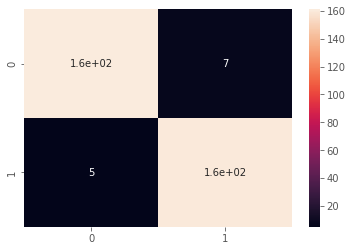

* ACC:  0.963963963963964


In [ ]:
adaboost = ensemble.AdaBoostClassifier()
adaboost.fit(X,Y)
evaluate(adaboost,X,Y)

---
### **과제02**
---

`Pandas` 데이터셋의  `penguins`를 사용합니다. 펭귄의 종을 다양한 모델을 이용해 예측해 보세요 

In [ ]:
import seaborn as sns
import pandas
df_pre = sns.load_dataset("penguins")
df_pre.head()
def preprocess_penguins(df_pre):

  #범주형 수치화(성별,섬,종)
  mask_m = df_pre["sex"] =='Male'
  mask_f = df_pre["sex"] =='Female'
  df_pre.loc[mask_m, "sex"] =0
  df_pre.loc[mask_f, "sex"] =1

  mask_i_t = df_pre["island"] =='Torgersen'
  mask_i_b = df_pre["island"] =='Biscoe'
  mask_i_d = df_pre["island"] =='Dream'
  df_pre.loc[mask_i_t, "island"] =0
  df_pre.loc[mask_i_b, "island"] =1
  df_pre.loc[mask_i_d, "island"] =2

  mask_s_a = df_pre["species"] =='Adelie' 
  mask_s_c = df_pre["species"] =='Chinstrap'
  mask_s_g = df_pre["species"] =='Gentoo'
  df_pre.loc[mask_s_a, "species"] =0
  df_pre.loc[mask_s_c, "species"] =1
  df_pre.loc[mask_s_g, "species"] =2
  
  #min-max정규화
  for col in ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']:
    df_pre[col] = (df_pre[col]-df_pre[col].min())/(df_pre[col].max()-df_pre[col].min())
  #(object->int)
  
  #결측값 줄삭제
  df_pre = df_pre.dropna(axis=0)
  return df_pre

train=preprocess_penguins(df_pre)
df=train.to_numpy()
X = df[:, 1:]
Y = df[:, 0]
print(X.shape,Y.shape)
Y = np.array(Y, dtype='int')
X[0] = np.array(X[0], dtype='int')
X[-1] = np.array(X[-1], dtype='int')
from sklearn import metrics

def evaluate(model,x,y):
  y_pred  = model.predict(x)
  print(y_pred.shape)
  m = metrics.confusion_matrix(y,y_pred)
  sns.heatmap(m,annot=True)
  plt.show()

  acc = model.score(x,y)
  print("* ACC: ", acc)

(333, 6) (333,)


* softmax회귀

(333,)


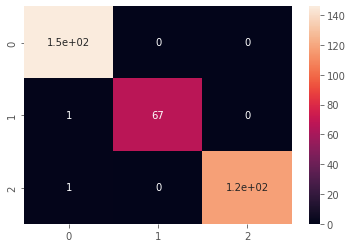

* ACC:  0.993993993993994


In [ ]:
linear = linear_model.LogisticRegression(multi_class='multinomial')
linear.fit(X,Y)
evaluate(linear,X,Y)

* SVC

(333,)


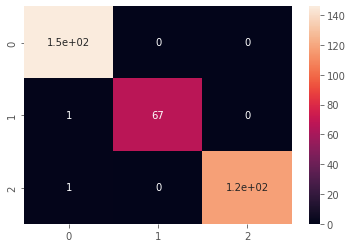

* ACC:  0.993993993993994


In [ ]:
svc = svm.SVC()
svc.fit(X,Y)
evaluate(linear,X,Y)

* rnd_forest

(333,)


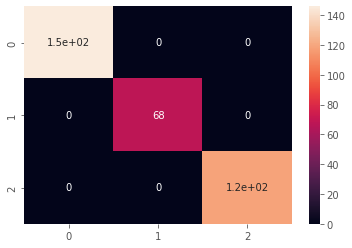

* ACC:  1.0


In [ ]:
rnd_forest = ensemble.RandomForestClassifier()
rnd_forest.fit(X,Y)
evaluate(rnd_forest,X,Y)

* adaboost

(333,)


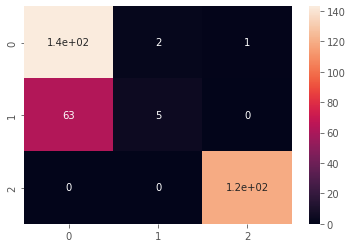

* ACC:  0.8018018018018018


In [ ]:
adaboost = ensemble.AdaBoostClassifier()
adaboost.fit(X,Y)
evaluate(adaboost,X,Y)

---
### **과제03**
---

타이타닉 데이터의 생존여부를 예측하세요 여러가지 머신러닝 모델 중 가장 성능이 좋은 모델을 선택하세요. 시간이 된다면, test 데이터를 적용 후 리더보드에 올려보세요.

 https://dacon.io/competitions/open/235539/overview/description


|index|column|설명|
|--|--|--|
|0.| PassengerId||
|1.| Survived | 생존여부|
|2. |Pclass| 티켓 등급|
|3.| Name |이름|
|4.| Sex| 성별|
|5.| Age |나이|
|6.| SibSp| 타이타닉호에 탑승한 형제/배우자 수|
|7.| Parch |타이타닉호에 탑승한 부모/자녀 수 |
|8.| Ticket |티켓 번호|
|10| Fare |여객 요금|
|11.| Cabin| 객실 번호|
|12.| Embarked| 승선항|


코랩에 파일을 빠르게 업로드를 하기 위해서는 아래 코드를 실행합니다.


```
from google.colab import files
files.upload()
```



In [103]:
from google.colab import files
files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (2).csv


{'test.csv': b'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r\n893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r\n894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r\n895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r\n896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r\n897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r\n898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r\n899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r\n900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r\n901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r\n902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r\n903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r\n904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S\r\n905,2,"Howard, Mr. Benja

In [241]:
import seaborn as sns
import pandas


def preproces_titanic(df_pre):
  #필요 없는 속성제거
  drop_list = ['PassengerId', 'Name', 'Ticket', 'Cabin']
  df_pre = df_pre.drop(drop_list,axis=1)
  #결측값 처리
  df_pre['Embarked']=df_pre['Embarked'].fillna("S")
  #결측값 중앙값으로 처리
  median_age = df_pre['Age'].median()
  df_pre['Age'] = df_pre['Age'].fillna(median_age)
  #이상값 처리
  mask = df_pre['Fare']>150
  df_pre.loc[ mask , 'Fare'] = 150
  #데이터변환 
  df_pre['Pclass'] = df_pre['Pclass']-1

  mask_m = df_pre["Sex"] =='male'
  mask_f = df_pre["Sex"] =='female'
  df_pre.loc[mask_m, "Sex"] =0
  df_pre.loc[mask_f, "Sex"] =1

  mask_s = df_pre["Embarked"] =='S'
  mask_c = df_pre["Embarked"] =='C'
  mask_q = df_pre["Embarked"] =='Q'
  df_pre.loc[mask_s, "Embarked"] =0
  df_pre.loc[mask_c, "Embarked"] =1
  df_pre.loc[mask_q, "Embarked"] =2

  #이산화
  bin = [0,15,30,45,100]
  group_name = [0,1,2,3]
  df_pre['Age']=pd.cut(df_pre['Age'], bins=bin, labels=group_name)

  #정규화
  df_pre['Fare'] = (df_pre['Fare']-df_pre['Fare'].min())/(df_pre['Fare'].max()-df_pre['Fare'].min())  
  return df_pre

In [242]:
df_train =pd.read_csv("train.csv")
train=preproces_titanic(df_train)
df=train.to_numpy()
X = df[:, 1:]
Y = df[:, 0]
print(X.shape,Y.shape)
Y = np.array(Y, dtype='int')
X[0:5] = np.array(X[0:5], dtype='int')
X[-1] = np.array(X[-1], dtype='int')
from sklearn import metrics

def evaluate(model,x,y):
  y_pred  = model.predict(x)
  print(y_pred.shape)
  m = metrics.confusion_matrix(y,y_pred)
  sns.heatmap(m,annot=True)
  plt.show()

  acc = model.score(x,y)
  print("* ACC: ", acc)

(891, 7) (891,)


* softmax회귀

(891,)


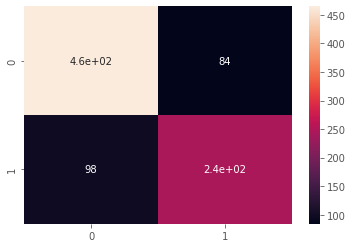

* ACC:  0.7957351290684624


In [243]:
linear = linear_model.LogisticRegression(multi_class='multinomial')
linear.fit(X,Y)
evaluate(linear,X,Y)

* SVC

(891,)


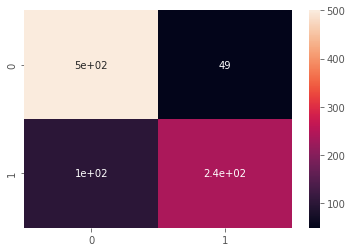

* ACC:  0.8316498316498316


In [244]:
svc = svm.SVC()
svc.fit(X,Y)
evaluate(svc,X,Y)

* rnd_forest

(891,)


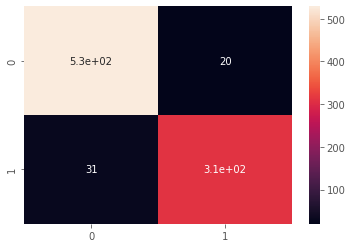

* ACC:  0.9427609427609428


In [108]:
rnd_forest = ensemble.RandomForestClassifier()
rnd_forest.fit(X,Y)
evaluate(rnd_forest,X,Y)

* adaboost

(891,)


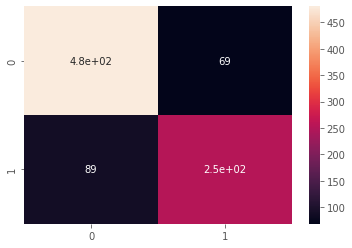

* ACC:  0.8226711560044894


In [109]:
adaboost = ensemble.AdaBoostClassifier()
adaboost.fit(X,Y)
evaluate(adaboost,X,Y)

In [263]:
import seaborn as sns
import pandas
import numpy as np


def preproces_titanic(df_pre):
  #필요 없는 속성제거
  drop_list = ['PassengerId', 'Name', 'Ticket', 'Cabin']
  df_pre = df_pre.drop(drop_list,axis=1)
  #결측값 처리
  #결측값 중앙값으로 처리
  median_age = df_pre['Age'].median()
  df_pre['Age'] = df_pre['Age'].fillna(median_age)
  
  median_Fare = df_pre['Fare'].median()
  df_pre['Fare'] = df_pre['Fare'].fillna(median_Fare)

  #이상값 처리
  mask = df_pre['Fare']>150
  df_pre.loc[ mask , 'Fare'] = 150
  #데이터변환 
  df_pre['Pclass'] = df_pre['Pclass']-1

  mask_m = df_pre["Sex"] =='male'
  mask_f = df_pre["Sex"] =='female'
  df_pre.loc[mask_m, "Sex"] =0
  df_pre.loc[mask_f, "Sex"] =1

  mask_s = df_pre["Embarked"] =='S'
  mask_c = df_pre["Embarked"] =='C'
  mask_q = df_pre["Embarked"] =='Q'
  df_pre.loc[mask_s, "Embarked"] =0
  df_pre.loc[mask_c, "Embarked"] =1
  df_pre.loc[mask_q, "Embarked"] =2

  #이산화
  bin = [0,15,30,45,100]
  group_name = [0,1,2,3]
  df_pre['Age']=pd.cut(df_pre['Age'], bins=bin, labels=group_name)

  #정규화
  df_pre['Fare'] = (df_pre['Fare']-df_pre['Fare'].min())/(df_pre['Fare'].max()-df_pre['Fare'].min())  
  return df_pre

In [264]:
df_train =pd.read_csv("test.csv")
train=preproces_titanic(df_train)
df=train.to_numpy()
X = df[:, :]

In [265]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    int64   
 1   Sex       418 non-null    object  
 2   Age       418 non-null    category
 3   SibSp     418 non-null    int64   
 4   Parch     418 non-null    int64   
 5   Fare      418 non-null    float64 
 6   Embarked  418 non-null    object  
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 20.3+ KB


In [266]:
y_pred  = svc.predict(X)

In [267]:
y_pred,y_pred.shape

(array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [268]:
submission =pd.read_csv("submission.csv")

In [269]:
submission['Survived']=y_pred

In [262]:
submission.to_csv("submission.csv",index=False)